In [1]:
from lib_plot import plot_R_t
from lib_sim import compute_spin_dynamics_TWA, chain_positions,generate_thermal_distribution_in_cylinder
from lib_exact import compute_spin_dynamics_exact
import numpy as np
import scipy.constants as cst
import qutip as qt

/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:103: SyntaxWarning: invalid escape sequence '\O'
  title += f' - $\Omega/\Gamma_0$={Omega_Rabi/Gamma_0:.2f}'
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:106: SyntaxWarning: invalid escape sequence '\l'
  title += f', $a/\lambda_0$={spacing/lambda_0:.2f}'
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:110: SyntaxWarning: invalid escape sequence '\G'
  plt.xlabel('Time ($\Gamma_0^{-1}$)', fontsize=14)
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:129: SyntaxWarning: invalid escape sequence '\O'
  max_title += f' - $\Omega/\Gamma_0$={Omega_Rabi/Gamma_0:.2f}'
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:131: SyntaxWarning: invalid escape sequence '\l'
  max_title += f', $a/\lambda_0$={spacing/lambda_0:.2f}'


In [5]:
# Define simulation parameters
num_particles=10           # Number of particles in the chain

spacing_factor=1/10         # Spacing between particles as a fraction of wavelength
t_max_factor=1              # Maximum simulation time as a factor of Gamma_0
num_steps=1000              # Number of time steps for the simulation
omega_z=0                   # Detuning (in rad/s)
Omega_Rabi=0                # Rabi frequency (set to 0 for no driving)
num_simulations=10000       # Number of TWA trajectories to average
listNumparticles=[10]       # List of particle numbers to simulate

time_factor = 1 # compression factor for the time steps to save memory

# Physical constants
atomic_dipole_moment = 2.533e-29 #C·m
dipole_moment=(1/np.sqrt(2))*np.array([1, 1j, 0])*atomic_dipole_moment  # Circular polarization
Gamma_0 = 2*np.pi *6.065 *1e6    # Natural linewidth in rad/s (≈ 38 MHz)
lambda_0 = 780e-9                # Laser wavelength in m (780 nm for Rb)
omega = 2*np.pi*cst.c/lambda_0

# chain of particles
positions = chain_positions(num_particles, spacing_factor, lambda_0)

#

t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps)

In [ ]:
# simulate the dynamics of the dissipative spins using TWA 
magnetizations_list, Gammas, J_matrices = compute_spin_dynamics_TWA(num_particles,
                                            spacing_factor,
                                            Gamma_0,
                                            t_max_factor,
                                            num_steps,
                                            time_factor,
                                            omega_z,
                                            Omega_Rabi,
                                            num_simulations,
                                            dipole_moment,
                                            listNumparticles,
                                            positions)

psi0=qt.tensor([qt.basis(2,0) for n in range(num_particles)])   # spins all up initially

# simulate the dynamics of the dissipative spins using exact method, will not work for N larger than 10 
result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, t_list,Gamma_0, psi0)


Simulating spin dynamics...
J matrix and Gamma matrix are computed
Gamma matrix [[38107518.88804419+0.j 35894529.8931674 +0.j 29736789.86936975+0.j
  20965641.46331799+0.j 11403519.68401885+0.j  2895954.11223073+0.j
  -3142906.76575915+0.j -6043360.14412528+0.j -5971497.13105245+0.j
  -3786913.65028271+0.j]
 [35894529.8931674 +0.j 38107518.88804419+0.j 35894529.8931674 +0.j
  29736789.86936975+0.j 20965641.46331799+0.j 11403519.68401885+0.j
   2895954.11223073+0.j -3142906.76575915+0.j -6043360.14412528+0.j
  -5971497.13105245+0.j]
 [29736789.86936975+0.j 35894529.8931674 +0.j 38107518.88804419+0.j
  35894529.8931674 +0.j 29736789.86936975+0.j 20965641.46331799+0.j
  11403519.68401885+0.j  2895954.11223073+0.j -3142906.76575915+0.j
  -6043360.14412528+0.j]
 [20965641.46331799+0.j 29736789.86936975+0.j 35894529.8931674 +0.j
  38107518.88804419+0.j 35894529.8931674 +0.j 29736789.86936975+0.j
  20965641.46331799+0.j 11403519.68401885+0.j  2895954.11223073+0.j
  -3142906.76575916+0.j]
 [11

Running simulations:   0%|          | 0/6000 [00:00<?, ?it/s]/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:255: ComplexWarning: Casting complex values to real discards the imaginary part
  xi_x[i] = np.sum(nu[i, :] * noise_x)
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:256: ComplexWarning: Casting complex values to real discards the imaginary part
  xi_y[i] = np.sum(nu[i, :] * noise_y)
Running simulations:  56%|█████▌    | 3361/6000 [05:07<04:12, 10.46it/s]

In [ ]:
result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, tlist,Gamma_0, psi0)


N 5
positions [[0.00e+00 0.00e+00 0.00e+00]
 [7.80e-08 0.00e+00 0.00e+00]
 [1.56e-07 0.00e+00 0.00e+00]
 [2.34e-07 0.00e+00 0.00e+00]
 [3.12e-07 0.00e+00 0.00e+00]]
Omega_R 0
J [[        0.        +0.j -86288433.657371  +0.j -14346616.7160802 +0.j
    -823072.78350824+0.j   3998665.24497365-0.j]
 [-86288433.657371  +0.j         0.        +0.j -86288433.657371  +0.j
  -14346616.7160802 +0.j   -823072.78350824+0.j]
 [-14346616.7160802 +0.j -86288433.657371  +0.j         0.        +0.j
  -86288433.657371  +0.j -14346616.7160802 +0.j]
 [  -823072.78350824+0.j -14346616.7160802 +0.j -86288433.657371  +0.j
          0.        +0.j -86288433.657371  +0.j]
 [  3998665.24497365-0.j   -823072.78350824+0.j -14346616.7160802 +0.j
  -86288433.657371  +0.j         0.        +0.j]]
J matrix computation time: 0.0016 seconds
Gamma matrix [[38107518.88804419+0.j 35894529.8931674 +0.j 29736789.86936975+0.j
  20965641.46331799+0.j 11403519.68401885+0.j]
 [35894529.8931674 +0.j 38107518.88804419+0.j 358945

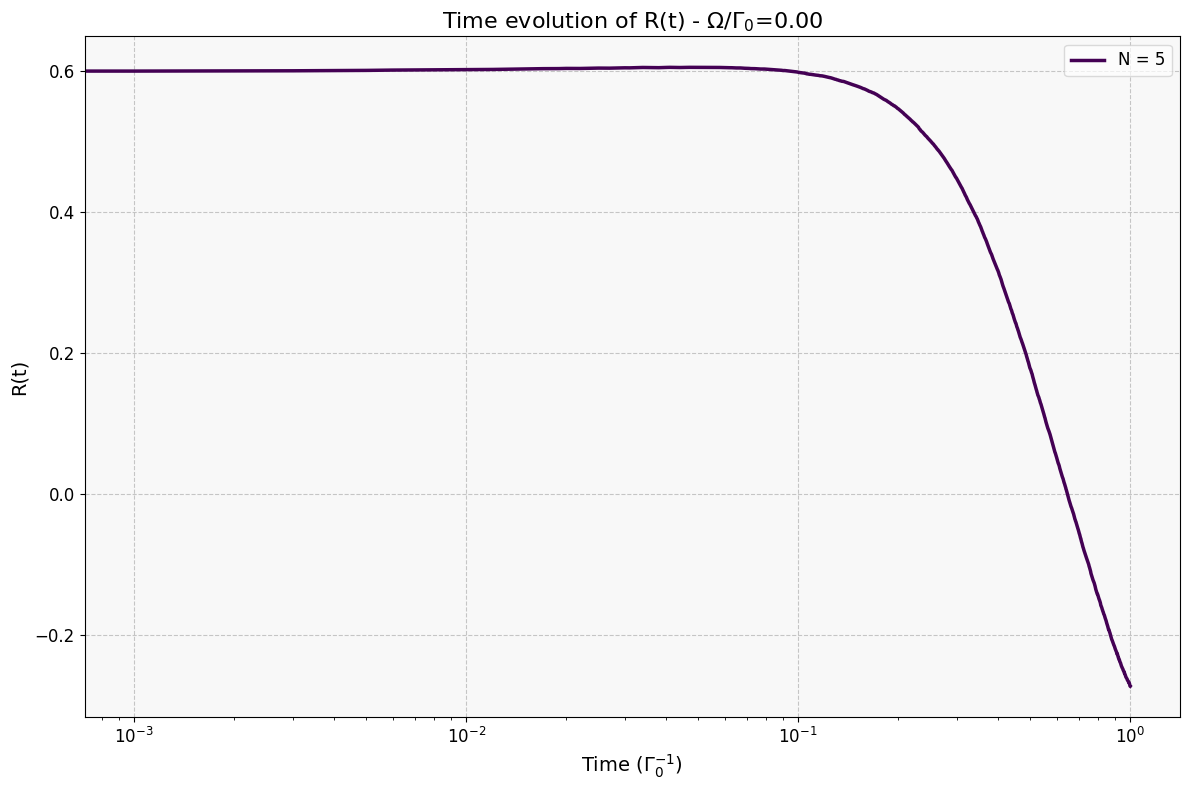

([array([ 6.00046047e-01-9.54661682e-20j,  6.00553336e-01-7.63729345e-20j,
          6.00747005e-01-7.63729345e-20j,  6.00974296e-01-9.54661682e-20j,
          6.01249881e-01+1.14559402e-19j,  6.01529254e-01-3.81864673e-20j,
          6.01970615e-01-9.54661682e-20j,  6.02144610e-01+7.63729345e-20j,
          6.02346377e-01-1.14559402e-19j,  6.02474336e-01+3.81864673e-20j,
          6.02620885e-01+7.63729345e-20j,  6.02776379e-01+7.63729345e-20j,
          6.02884131e-01-3.81864673e-20j,  6.03092563e-01-7.63729345e-20j,
          6.03320113e-01+0.00000000e+00j,  6.03584521e-01+7.63729345e-20j,
          6.03814300e-01+3.81864673e-20j,  6.03994080e-01-1.52745869e-19j,
          6.03972681e-01+1.14559402e-19j,  6.04086930e-01-7.63729345e-20j,
          6.04354428e-01+3.81864673e-20j,  6.04288858e-01-1.14559402e-19j,
          6.04262555e-01+1.90932336e-19j,  6.04446834e-01-1.90932336e-19j,
          6.04645511e-01-3.81864673e-20j,  6.04808714e-01+2.29118804e-19j,
          6.04749856e-01+

In [14]:
t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps//time_factor)
plot_R_t(magnetizations_list, t_list, Gammas, J_matrices, listNumparticles, Gamma_0, num_simulations, Omega_Rabi=0, spacing=None, lambda_0=None, plot_max=False)


In [8]:
J_matrices

[array([[ 0.00000000e+00+0.j, -1.34487588e+65+0.j, -2.23603767e+64+0.j,
         -1.28282632e+63+0.j,  6.23224716e+63-0.j,  7.80827619e+63-0.j,
          6.03739476e+63-0.j,  2.74089964e+63-0.j, -5.85098835e+62+0.j,
         -2.87682573e+63+0.j],
        [-1.34487588e+65+0.j,  0.00000000e+00+0.j, -1.34487588e+65+0.j,
         -2.23603767e+64+0.j, -1.28282632e+63+0.j,  6.23224716e+63-0.j,
          7.80827619e+63-0.j,  6.03739476e+63-0.j,  2.74089964e+63-0.j,
         -5.85098835e+62+0.j],
        [-2.23603767e+64+0.j, -1.34487588e+65+0.j,  0.00000000e+00+0.j,
         -1.34487588e+65+0.j, -2.23603767e+64+0.j, -1.28282632e+63+0.j,
          6.23224716e+63-0.j,  7.80827619e+63-0.j,  6.03739476e+63-0.j,
          2.74089964e+63-0.j],
        [-1.28282632e+63+0.j, -2.23603767e+64+0.j, -1.34487588e+65+0.j,
          0.00000000e+00+0.j, -1.34487588e+65+0.j, -2.23603767e+64+0.j,
         -1.28282632e+63+0.j,  6.23224716e+63-0.j,  7.80827619e+63-0.j,
          6.03739476e+63-0.j],
        [ 6.

[array([[[[ 1.00000000e+000,  1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          ...,
          [-1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          [-1.00000000e+000,  1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000,  1.00000000e+000,  1.00000000e+000]],
 
         [[ 6.21646278e+163, -4.12584785e+163,  2.51183423e+163],
          [-5.45440452e+163,  6.68883274e+163, -6.92770673e+163],
          [-5.32232696e+163,  6.07231931e+163, -6.18705443e+163],
          ...,
          [-5.23418693e+162, -1.27539546e+163,  1.49852921e+161],
          [-2.11966445e+161,  7.05780689e+162,  8.13450345e+162],
          [-1.19241027e+163, -5.46578272e+162, -8.83671954e+162]],
 
         [[             nan,              nan,              nan],
          [             nan,              nan,              nan],
          [             nan,            